In [1]:
#Libreries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

#Dimension reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#Clusters
from sklearn.cluster import KMeans

#Models
from sklearn.linear_model import LinearRegression

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from keras.layers import Dropout

In [2]:
#Import the data

random_state=0

df=pd.read_csv("Data/train.csv",index_col=0)
df = df.sample(n=5000, replace=False, random_state = random_state)
target = df["TARGET"]
df= df.drop(["TARGET",],axis=1)
df.head(5)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,,,,,,,,,,,,,,,,,,,,,
72815,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94804.740000
35209,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119861.310000
56215,2,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
69919,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51001.260000
100469,2,80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93676.230000


# Pregunta 1

Utilice PCA para reducir la dimensionalidad de su conjunto de datos a 15, 10
y 5 features. Entrene un modelo clásico en los datos reducidos (puede elegir
cualquier modelo clásico, se recomienda utilizar sklearn) y compare el accuracy
en el conjunto de test para cada caso.

In [53]:

#Aplicar PCA y dejar 15 features
pca = PCA(15)
df_15 = pca.fit_transform(df)
x_train, x_test, y_train, y_test = train_test_split(df_15, target, test_size=.3, random_state=random_state)

model = LinearRegression()
model.fit(x_train, y_train)
print(f"Model accuracy on Test set with 15 features:{model.score(x_test, y_test)}")

#Aplicar PCA y dejar 10 features
pca = PCA(10)
df_10 = pca.fit_transform(df)
x_train, x_test, y_train, y_test = train_test_split(df_10, target, test_size=.3, random_state=random_state)

model = LinearRegression()
model.fit(x_train, y_train)
print(f"Model accuracy on Test set with 10 features:{model.score(x_test, y_test)}")

#Aplicar PCA y dejar 5 features
pca = PCA(5)
df_5 = pca.fit_transform(df)
x_train, x_test, y_train, y_test = train_test_split(df_5, target, test_size=.3, random_state=random_state)

model = LinearRegression()
model.fit(x_train, y_train)
print(f"Model accuracy on Test set with 5 features:{model.score(x_test, y_test)}")


Model accuracy on Test set with 15 features:-2.986346601899482e+16
Model accuracy on Test set with 10 features:-244580745991461.34
Model accuracy on Test set with 5 features:-0.00711548563743114


Se puede notar claramente que al reducir cada vez más las componentes utilizadas en PCA va aumentando el accuracy considerablemente, ya que comienza con un accuracy tremendamente alto (del orden de $e+16$), hasta llegar a un valor casi cercano a 0. El model accuracy indica el coeficiente de determinación de la predicción, el cual, mientrás más oscile cerca del 1, se tendrá una gran confiabilidad del modelo creado. Si bien el valor obtenido con 5 componentes no es el mejor, bajó considerablemente, por lo que se ve que PCA realiza un buen trabajo reduciendo la dimensionalidad del conjunto de datos y agarrando la mayoría de la varianza de los datos.

Utilice t-SNE para reducir sus datos a 2 dimensiones (puede comenzar desde los
datos originales o desde uno de los conjuntos ya reducidos con PCA). Grafique
1000 puntos de su conjunto de entrenamiento en el plano.

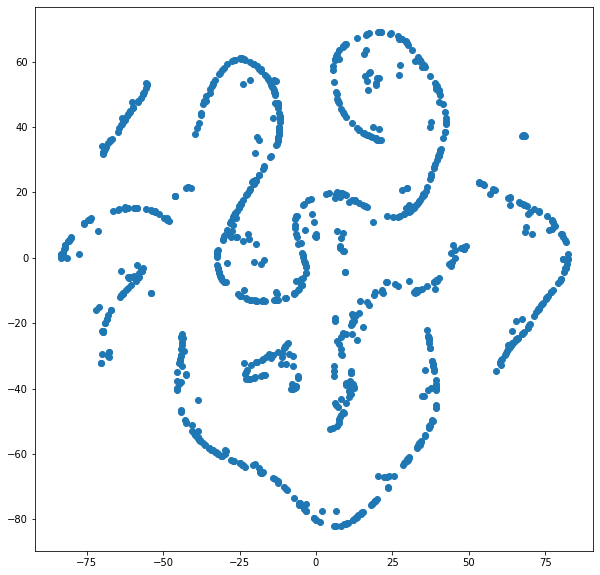

In [54]:
#Aplicar tsne con 15 features reducidos con pca

tsne = TSNE()
df_tsne_15 = tsne.fit_transform(df_15)
plt.figure(figsize=(10,10))
plt.scatter(df_tsne_15[:1000,0],df_tsne_15[:1000,1])
plt.show()


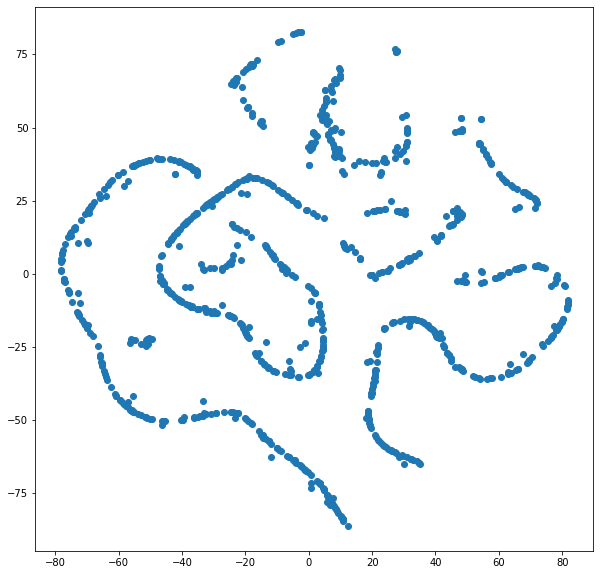

In [55]:
#Aplicar tsne con 10 features reducidos con pca

tsne = TSNE()
df_tsne_10 = tsne.fit_transform(df_10)
plt.figure(figsize=(10,10))
plt.scatter(df_tsne_10[:1000,0],df_tsne_10[:1000,1])
plt.show()

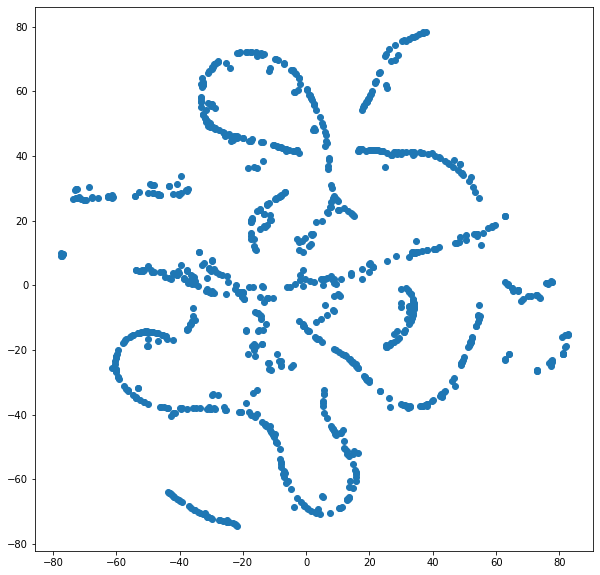

In [56]:
#Aplicar tsne con 5 features reducidos con pca

tsne = TSNE()
df_tsne_5 = tsne.fit_transform(df_5)
plt.figure(figsize=(10,10))
plt.scatter(df_tsne_5[:1000,0],df_tsne_5[:1000,1])
plt.show()

Sobre los datos reducidos con t-SNE aplique el método de K-means y grafique
los clusters (puede hacerlo pintando los puntos de diferente color) en el gráfico
de dos dimensiones obtenido con t-SNE. Puede elegir el número de clusters que
le parezca, como mínimo 2. Es posible que los datos no se vean claramente
separados, en tal caso utilice 4 clusters.

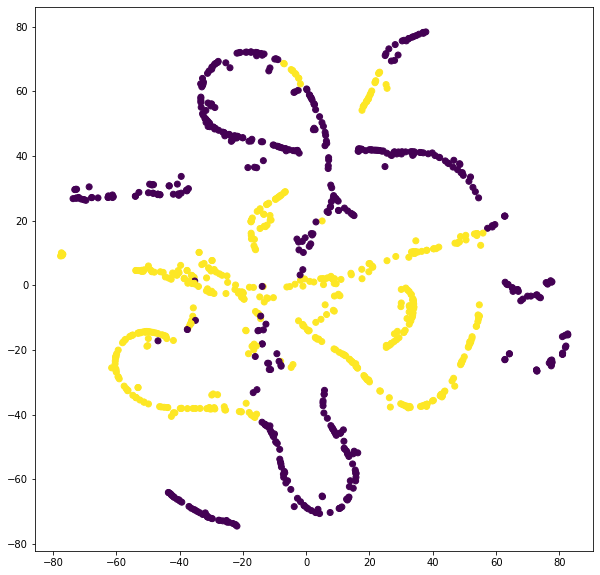

In [57]:
#Aplicar kmeans con 2 componentes sobre tsne de con 5 features reducidos con pca
kmeans = KMeans(n_clusters=2,random_state=random_state)
df_kmeans = kmeans.fit(df_tsne_15)

plt.figure(figsize=(10,10))
plt.scatter(df_tsne_5[:1000,0],df_tsne_5[:1000,1],c=df_kmeans.labels_[:1000])
plt.show()


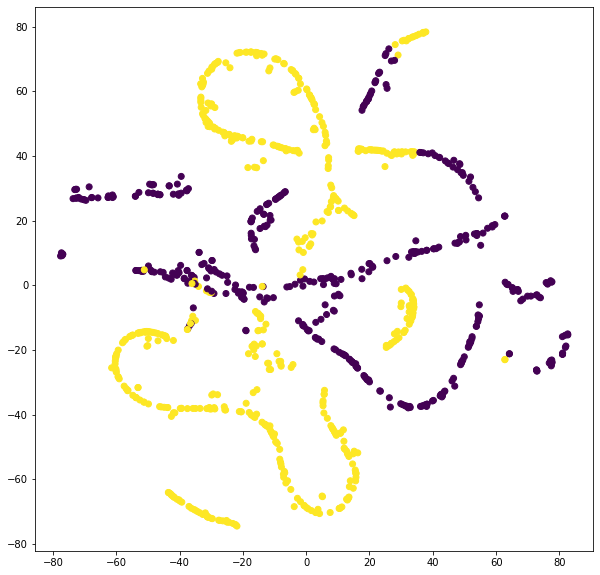

In [58]:
#Aplicar kmeans con 2 componentes sobre tsne de con 10 features reducidos con pca
kmeans=KMeans(n_clusters=2,random_state=random_state)
df_kmeans =kmeans.fit(df_tsne_10)

plt.figure(figsize=(10,10))
plt.scatter(df_tsne_5[:1000,0],df_tsne_5[:1000,1],c=df_kmeans.labels_[:1000])
plt.show()


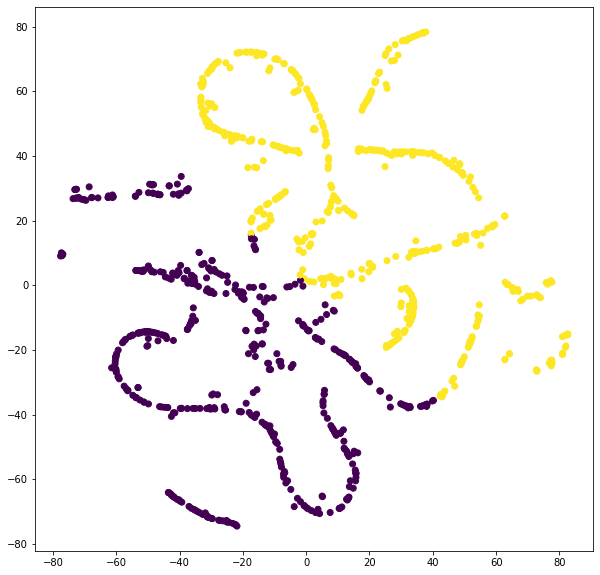

In [59]:
#Aplicar kmeans con 2 componentes sobre tsne de con 5 features reducidos con pca
kmeans=KMeans(n_clusters=2,random_state=random_state)
df_kmeans =kmeans.fit(df_tsne_5)

plt.figure(figsize=(10,10))
plt.scatter(df_tsne_5[:1000,0],df_tsne_5[:1000,1],c=df_kmeans.labels_[:1000])
plt.show()

# Pregunta 2

### Parte 1

Entrene una arquitectura de red neuronal Densa en sus datos, debe implementar al menos 3 versiones con una capa, 3 capas y más de 5 capas. Además, debe probar al menos 5 versiones de cada versión.

In [3]:
def sparsity(A):
    # Calculamos la cantidad de elementos no nulos de A
    cantidad_no_ceros = np.count_nonzero(A)
    
    # Calculamos el total de elementos de A
    total_elementos = A.size
    
    # Calculamos la sparsity
    sparsity = 1 - cantidad_no_ceros/total_elementos
    
    return sparsity

sparsity(df)

0.9087864498644986

In [4]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [TARGET]')
    plt.legend()
    plt.grid(True)
    plt.show()

Función loss: poisson
Accuracy 1 capa: 89.20


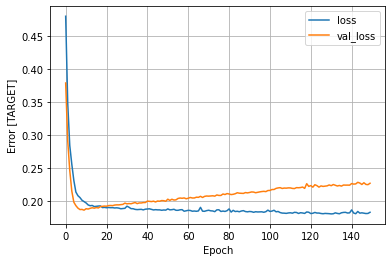

Accuracy 3 capas: 93.75


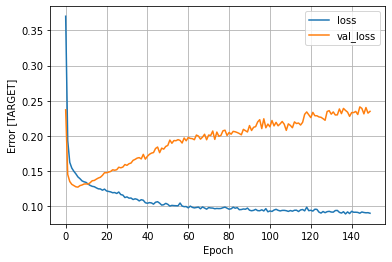

Accuracy 6 capas: 93.83


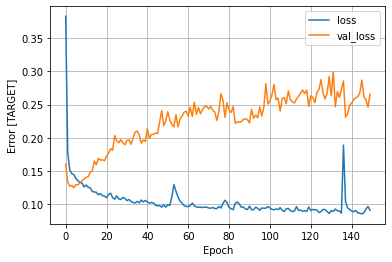


Función loss: binary_crossentropy
Accuracy 1 capa: 93.33


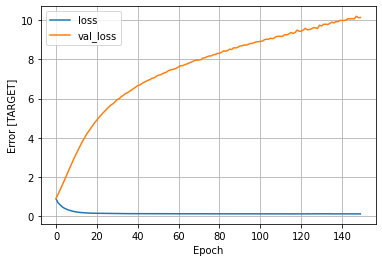

Accuracy 3 capas: 93.92


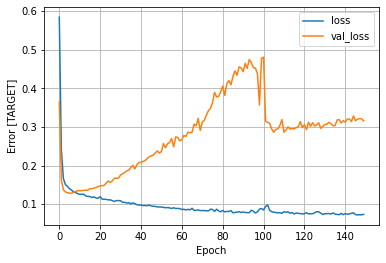

Accuracy 6 capas: 93.98


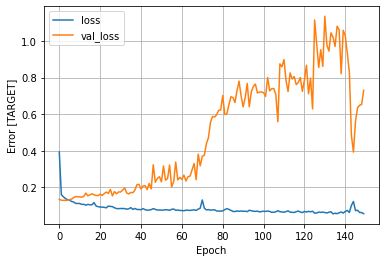


Función loss: categorical_crossentropy
Accuracy 1 capa: 73.45


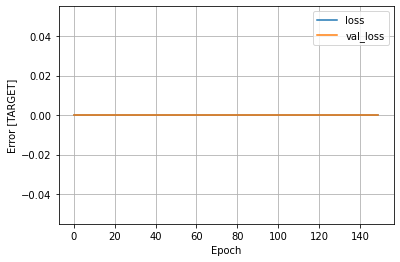

Accuracy 3 capas: 95.63


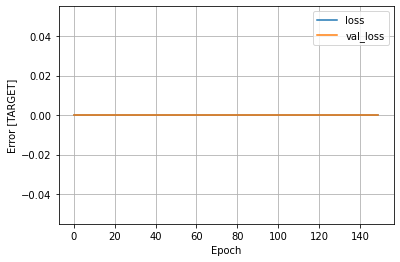

Accuracy 6 capas: 95.63


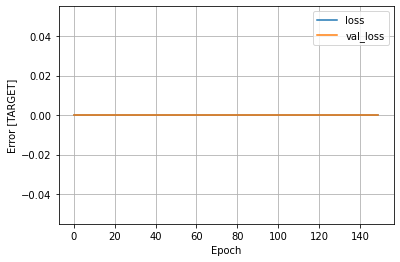

In [5]:
poisson_normalizacion = []
binary_crossentropy_normalizacion = []
categorical_crossentropy_normalizacion = []

def Normalizacion(df,loss,lista):
    print("Función loss: "+loss)
    X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.8, random_state=random_state)
    normalizer = preprocessing.Normalization(axis=-1)
    normalizer.adapt(np.array(X_train))
    
    # 1 capa
    model = tf.keras.Sequential([normalizer,layers.Dense(units=15)])
    model.add(Dense(1,activation ='sigmoid'))
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    history_1 = model.fit(X_train, y_train, epochs=150,verbose=0,validation_split = 0.2)
    _, accuracy = model.evaluate(X_test, y_test,verbose=0)
    print('Accuracy 1 capa: %.2f' % (accuracy*100))
    plot_loss(history_1)
    lista.append(accuracy*100)
    
    # 3 capa
    model = tf.keras.Sequential([normalizer,layers.Dense(units=15)])
    model.add(Dense(50,activation ='relu'))
    model.add(Dense(15,activation ='relu'))
    model.add(Dense(1,activation ='sigmoid'))
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    history_3 = model.fit(X_train, y_train, epochs=150,verbose=0,validation_split = 0.2)
    _, accuracy = model.evaluate(X_test, y_test,verbose=0)
    print('Accuracy 3 capas: %.2f' % (accuracy*100))
    plot_loss(history_3)
    lista.append(accuracy*100)
    
    # 6 capa
    model = tf.keras.Sequential([normalizer,layers.Dense(units=15)])
    model.add(Dense(100,activation ='relu'))
    model.add(Dense(75,activation ='relu'))
    model.add(Dense(50,activation ='relu'))
    model.add(Dense(35,activation ='relu'))
    model.add(Dense(15,activation ='relu'))
    model.add(Dense(1,activation ='sigmoid'))
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    history_6 = model.fit(X_train, y_train, epochs=150,verbose=0,validation_split = 0.2)
    _, accuracy = model.evaluate(X_test, y_test,verbose=0)
    print('Accuracy 6 capas: %.2f' % (accuracy*100))
    plot_loss(history_6)
    lista.append(accuracy*100)

    print()

Normalizacion(df,'poisson',poisson_normalizacion)
Normalizacion(df,'binary_crossentropy',binary_crossentropy_normalizacion)
Normalizacion(df,'categorical_crossentropy',categorical_crossentropy_normalizacion)

Función loss: poisson
Accuracy 1 capa: 95.48


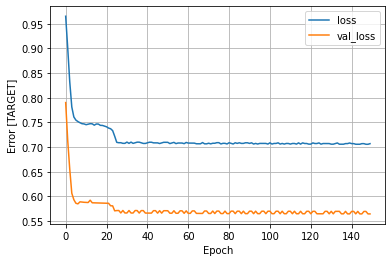

Accuracy 3 capa: 95.63


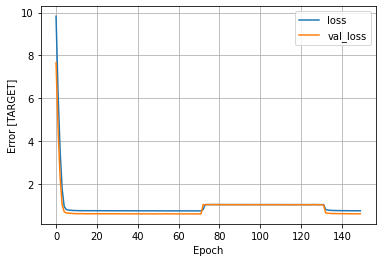

Accuracy 6 capas: 94.88


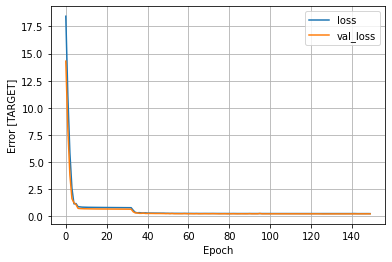


Función loss: binary_crossentropy
Accuracy 1 capa: 93.12


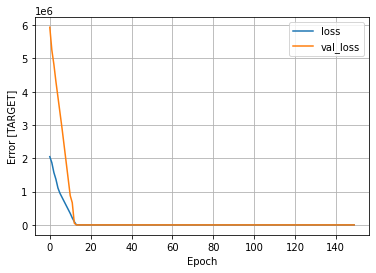

Accuracy 3 capa: 91.40


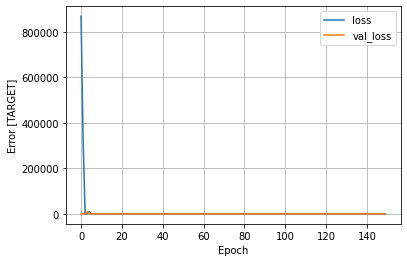

Accuracy 6 capas: 95.53


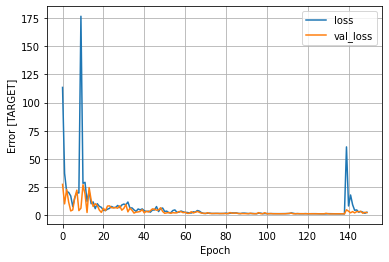


Función loss: categorical_crossentropy
Accuracy 1 capa: 95.55


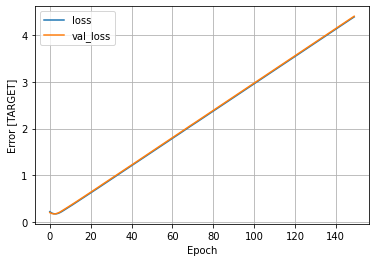

Accuracy 3 capa: 95.60


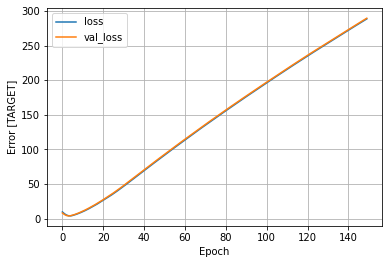

Accuracy 6 capas: 95.63


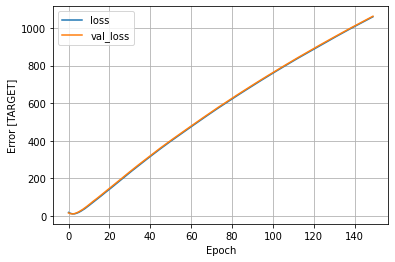

In [11]:
poisson_regularizacion = []
binary_crossentropy_regularizacion = []
categorical_crossentropy_regularizacion = []

def Regularizacion(df,loss,lista):
    print("Función loss: "+loss)
    X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.8, random_state=random_state)
    normalizer = preprocessing.Normalization(axis=-1)
    normalizer.adapt(np.array(X_train))
    
    # 1 capa
    model = tf.keras.Sequential()
    model.add(Dense(1,activation ='sigmoid',kernel_regularizer=keras.regularizers.l1()))
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    history_1 = model.fit(X_train, y_train, epochs=150,verbose=0,validation_split = 0.2)
    _, accuracy = model.evaluate(X_test, y_test,verbose=0)
    print('Accuracy 1 capa: %.2f' % (accuracy*100))
    plot_loss(history_1)
    lista.append(accuracy*100)
    
    # 3 capa
    model = tf.keras.Sequential()
    model.add(Dense(50,activation ='relu',kernel_regularizer=keras.regularizers.l1()))
    model.add(Dense(15,activation ='relu',kernel_regularizer=keras.regularizers.l1(0.001)))
    model.add(Dense(1,activation ='sigmoid',kernel_regularizer=keras.regularizers.l1(0.0001)))
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    history_3 = model.fit(X_train, y_train, epochs=150,verbose=0,validation_split = 0.2)
    _, accuracy = model.evaluate(X_test, y_test,verbose=0)
    print('Accuracy 3 capa: %.2f' % (accuracy*100))
    plot_loss(history_3)
    lista.append(accuracy*100)
    
    # 6 capa
    model = tf.keras.Sequential()
    model.add(Dense(100,activation ='relu',kernel_regularizer=keras.regularizers.l1()))
    model.add(Dense(75,activation ='relu',kernel_regularizer=keras.regularizers.l1(0.001)))
    model.add(Dense(50,activation ='relu',kernel_regularizer=keras.regularizers.l1(0.0001)))
    model.add(Dense(35,activation ='relu',kernel_regularizer=keras.regularizers.l1(0.00001)))
    model.add(Dense(15,activation ='relu',kernel_regularizer=keras.regularizers.l1(0.000001)))
    model.add(Dense(1,activation ='sigmoid',kernel_regularizer=keras.regularizers.l1(0.0000001)))
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    history_6 = model.fit(X_train, y_train, epochs=150,verbose=0,validation_split = 0.2)
    _, accuracy = model.evaluate(X_test, y_test,verbose=0)
    print('Accuracy 6 capas: %.2f' % (accuracy*100))
    plot_loss(history_6)
    lista.append(accuracy*100)
    print()

Regularizacion(df,'poisson',poisson_regularizacion)
Regularizacion(df,'binary_crossentropy',binary_crossentropy_regularizacion)
Regularizacion(df,'categorical_crossentropy',categorical_crossentropy_regularizacion)

Función loss: poisson
Cantidad de dropout:  0.3
Accuracy 1 capa: 94.52


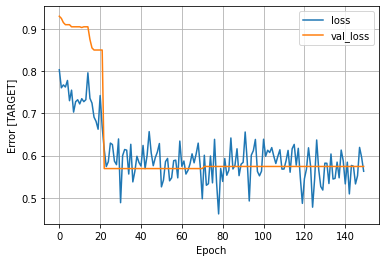

Accuracy 3 capa: 95.63


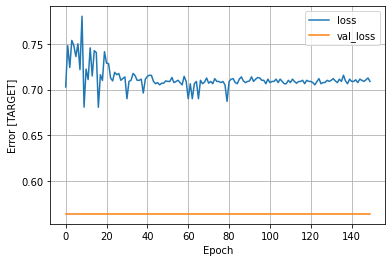

Accuracy 6 capas: 95.63


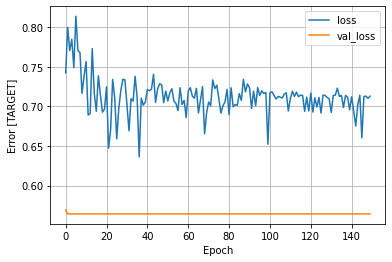


Función loss: binary_crossentropy
Cantidad de dropout:  0.3
Accuracy 1 capa: 94.05


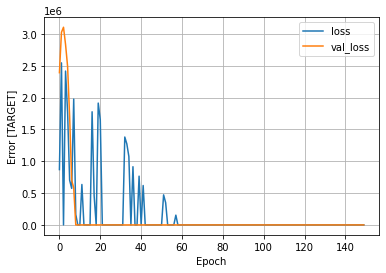

Accuracy 3 capa: 95.63


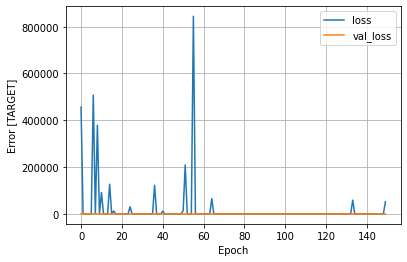

Accuracy 6 capas: 95.63


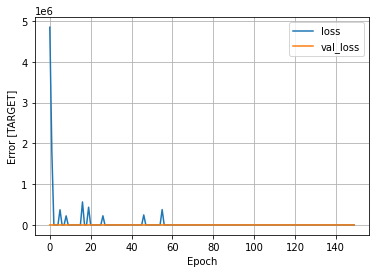


Función loss: categorical_crossentropy
Cantidad de dropout:  0.3
Accuracy 1 capa: 95.55


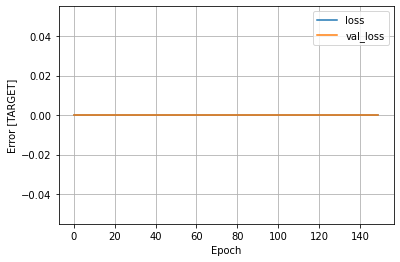

Accuracy 3 capa: 95.63


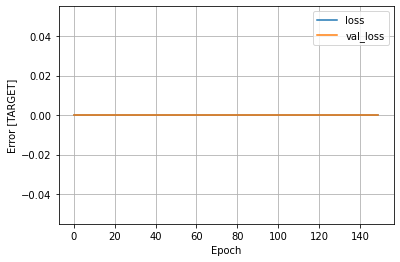

Accuracy 6 capas: 95.63


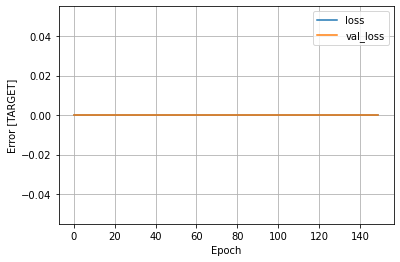

In [7]:
poisson_func_dropout = []
binary_crossentropy_func_dropout = []
categorical_crossentropy_func_dropout = []

def Func_Dropout(df,loss,lista):
    dropout = 0.3
    print("Función loss: "+loss)
    print("Cantidad de dropout: ",dropout)
    X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.8, random_state=random_state)
    normalizer = preprocessing.Normalization(axis=-1)
    normalizer.adapt(np.array(X_train))
    
    # 1 capa
    model = tf.keras.Sequential()
    model.add(Dropout(dropout))
    model.add(Dense(1,activation ='sigmoid'))
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    history_1 = model.fit(X_train, y_train, epochs=150,verbose=0,validation_split = 0.2)
    _, accuracy = model.evaluate(X_test, y_test,verbose=0)
    print('Accuracy 1 capa: %.2f' % (accuracy*100))
    plot_loss(history_1)
    lista.append(accuracy*100)
    
    # 3 capa
    model = tf.keras.Sequential()
    model.add(Dense(50,activation ='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(15,activation ='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1,activation ='sigmoid'))
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    history_3 = model.fit(X_train, y_train, epochs=150,verbose=0,validation_split = 0.2)
    _, accuracy = model.evaluate(X_test, y_test,verbose=0)
    print('Accuracy 3 capa: %.2f' % (accuracy*100))
    plot_loss(history_3)
    lista.append(accuracy*100)
    
    # 6 capa
    model = tf.keras.Sequential()
    model.add(Dense(100,activation ='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(75,activation ='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(50,activation ='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(35,activation ='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(15,activation ='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1,activation ='sigmoid'))
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    history_6 = model.fit(X_train, y_train, epochs=150,verbose=0,validation_split = 0.2)
    _, accuracy = model.evaluate(X_test, y_test,verbose=0)
    print('Accuracy 6 capas: %.2f' % (accuracy*100))
    plot_loss(history_6)
    lista.append(accuracy*100)
    print()

Func_Dropout(df,'poisson',poisson_func_dropout)
Func_Dropout(df,'binary_crossentropy',binary_crossentropy_func_dropout)
Func_Dropout(df,'categorical_crossentropy',categorical_crossentropy_func_dropout)

Función loss: poisson
Tamaño del batch:  5
Accuracy 1 capa: 9.88


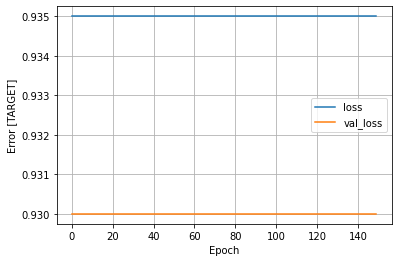

Accuracy 3 capas: 91.58


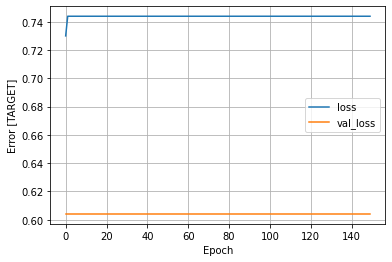

Accuracy 6 capas: 95.60


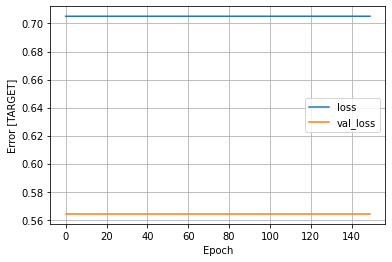


Función loss: binary_crossentropy
Tamaño del batch:  5
Accuracy 1 capa: 90.55


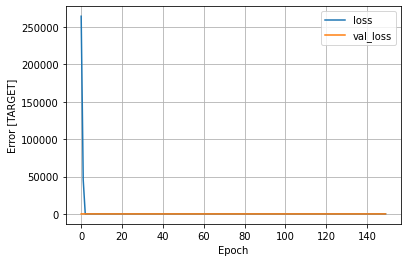

Accuracy 3 capas: 95.42


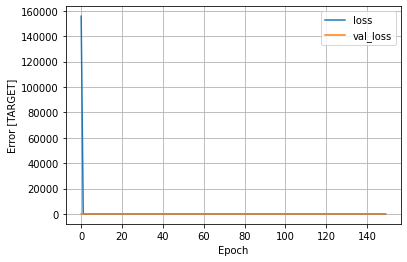

Accuracy 6 capas: 95.63


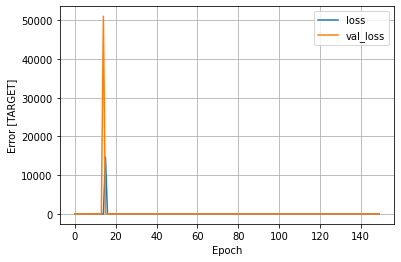


Función loss: categorical_crossentropy
Tamaño del batch:  5
Accuracy 1 capa: 95.57


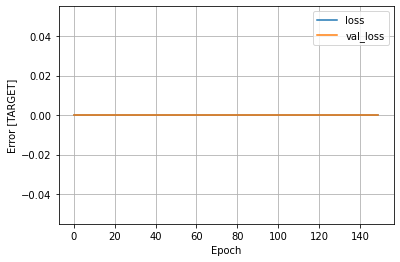

Accuracy 3 capas: 95.63


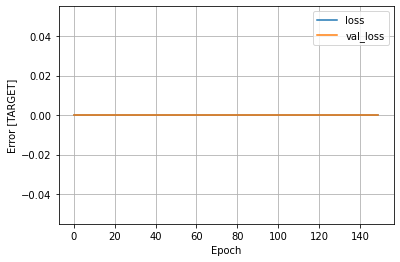

Accuracy 6 capas: 95.63


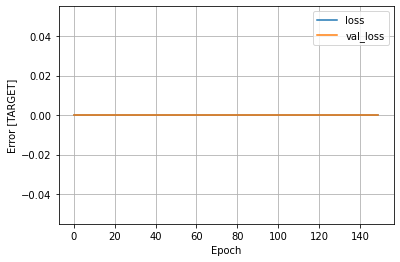

In [19]:
poisson_batch = []
binary_crossentropy_batch = []
categorical_crossentropy_batch = []

def Batch(df,loss,lista):
    batch = 5
    print("Función loss: "+loss)
    print("Tamaño del batch: ",batch)
    X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.8, random_state=random_state)
    
    # 1 capa
    model = tf.keras.Sequential()
    model.add(Dense(1,activation ='sigmoid'))
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    history_1 = model.fit(X_train, y_train, epochs=150, batch_size=batch,verbose=0,validation_split = 0.2)
    _, accuracy = model.evaluate(X_test, y_test,verbose=0)
    print('Accuracy 1 capa: %.2f' % (accuracy*100))
    plot_loss(history_1)
    lista.append(accuracy*100)
    
    # 3 capa
    model = tf.keras.Sequential()
    model.add(Dense(50,activation ='relu'))
    model.add(Dense(15,activation ='relu'))
    model.add(Dense(1,activation ='sigmoid'))
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    history_3 = model.fit(X_train, y_train, epochs=150, batch_size=batch,verbose=0,validation_split = 0.2)
    _, accuracy = model.evaluate(X_test, y_test,verbose=0)
    print('Accuracy 3 capas: %.2f' % (accuracy*100))
    plot_loss(history_3)
    lista.append(accuracy*100)
    
    # 6 capa
    model = tf.keras.Sequential()
    model.add(Dense(100,activation ='relu'))
    model.add(Dense(75,activation ='relu'))
    model.add(Dense(50,activation ='relu'))
    model.add(Dense(35,activation ='relu'))
    model.add(Dense(15,activation ='relu'))
    model.add(Dense(1,activation ='sigmoid'))
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    history_6 = model.fit(X_train, y_train, epochs=150, batch_size=batch,verbose=0,validation_split = 0.2)
    _, accuracy = model.evaluate(X_test, y_test,verbose=0)
    print('Accuracy 6 capas: %.2f' % (accuracy*100))
    plot_loss(history_6)
    lista.append(accuracy*100)
    print()

Batch(df,'poisson',poisson_batch)
Batch(df,'binary_crossentropy',binary_crossentropy_batch)
Batch(df,'categorical_crossentropy',categorical_crossentropy_batch)

Función loss: poisson
Tamaño de la dimensión:  5
Accuracy 1 capa: 5.30


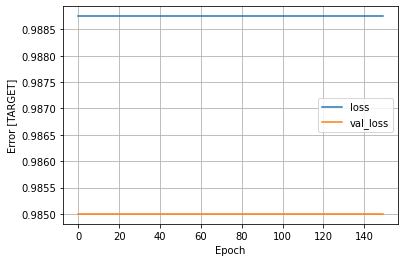

Accuracy 3 capas: 95.60


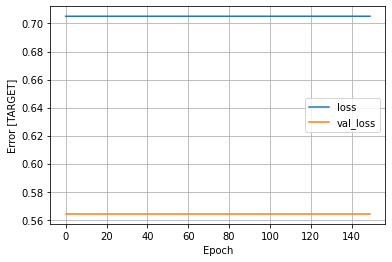

Accuracy 6 capas: 91.35


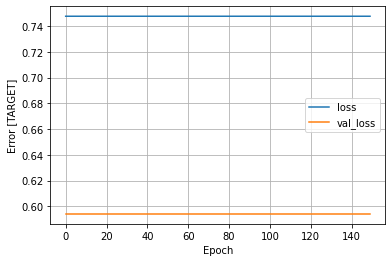


Función loss: binary_crossentropy
Tamaño de la dimensión:  5
Accuracy 1 capa: 94.88


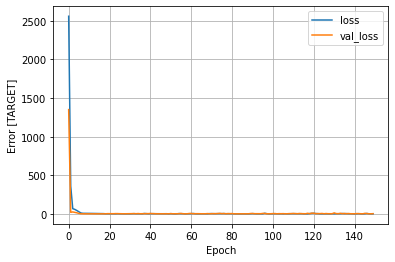

Accuracy 3 capas: 94.70


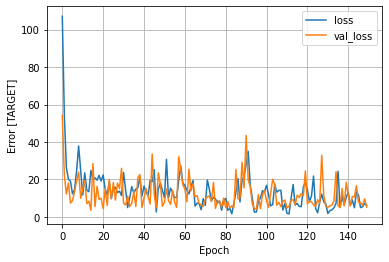

Accuracy 6 capas: 95.57


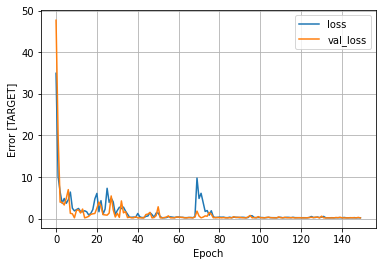


Función loss: categorical_crossentropy
Tamaño de la dimensión:  5
Accuracy 1 capa: 95.57


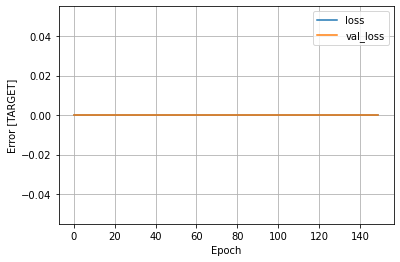

Accuracy 3 capas: 95.63


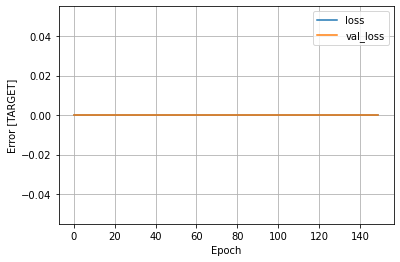

Accuracy 6 capas: 95.63


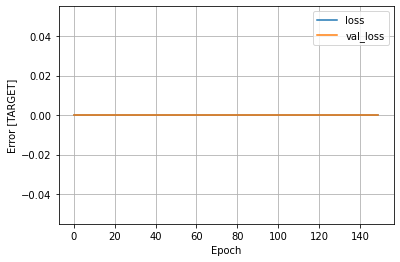

In [20]:
poisson_dimensionalidad = []
binary_crossentropy_dimensionalidad = []
categorical_crossentropy_dimensionalidad = []

def Dimensionalidad(df,loss,lista):
    print("Función loss: "+loss)
    print("Tamaño de la dimensión: ",5)
    X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.8, random_state=random_state)
    
    # 1 capa
    model = tf.keras.Sequential()
    model.add(Dense(1,activation ='sigmoid'))
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    history_1 = model.fit(X_train, y_train, epochs=150,verbose=0,validation_split = 0.2)
    _, accuracy = model.evaluate(X_test, y_test,verbose=0)
    print('Accuracy 1 capa: %.2f' % (accuracy*100))
    plot_loss(history_1)
    lista.append(accuracy*100)
    
    # 3 capa
    model = tf.keras.Sequential()
    model.add(Dense(50,activation ='relu'))
    model.add(Dense(15,activation ='relu'))
    model.add(Dense(1,activation ='sigmoid'))
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    history_3 = model.fit(X_train, y_train, epochs=150,verbose=0,validation_split = 0.2)
    _, accuracy = model.evaluate(X_test, y_test,verbose=0)
    print('Accuracy 3 capas: %.2f' % (accuracy*100))
    plot_loss(history_3)
    lista.append(accuracy*100)
    
    # 6 capa
    model = tf.keras.Sequential()
    model.add(Dense(100,activation ='relu'))
    model.add(Dense(75,activation ='relu'))
    model.add(Dense(50,activation ='relu'))
    model.add(Dense(35,activation ='relu'))
    model.add(Dense(15,activation ='relu'))
    model.add(Dense(1,activation ='sigmoid'))
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    history_6 = model.fit(X_train, y_train, epochs=150,verbose=0,validation_split = 0.2)
    _, accuracy = model.evaluate(X_test, y_test,verbose=0)
    print('Accuracy 6 capas: %.2f' % (accuracy*100))
    plot_loss(history_6)
    lista.append(accuracy*100)
    print()

Dimensionalidad(df,'poisson',poisson_dimensionalidad)
Dimensionalidad(df,'binary_crossentropy',binary_crossentropy_dimensionalidad)
Dimensionalidad(df,'categorical_crossentropy',categorical_crossentropy_dimensionalidad)

In [21]:
def plot_accurace(poisson,binary_crossentropy,categorical_crossentropy,title):
    plt.plot([1,3,6],poisson, label='Poisson',marker='.')
    plt.plot([1,3,6],binary_crossentropy, label='binary_crossentropy',marker='.')
    plt.plot([1,3,6],categorical_crossentropy,label='categorical_crossentropy',marker='.')
    plt.xlabel('Numero de capas')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.title(title)
    plt.show()

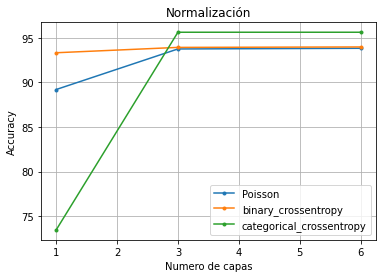

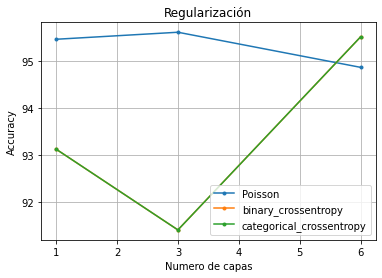

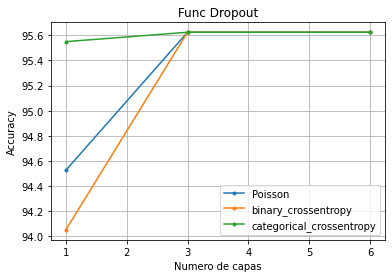

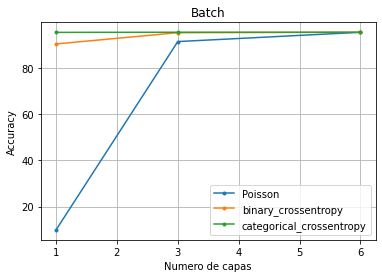

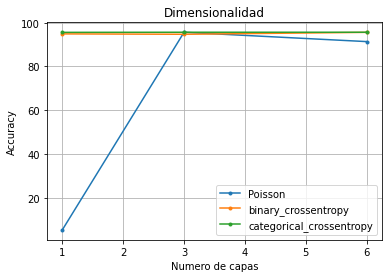

In [23]:
plot_accurace(poisson_normalizacion,binary_crossentropy_normalizacion,categorical_crossentropy_normalizacion,'Normalización')

plot_accurace(poisson_regularizacion,binary_crossentropy_regularizacion,binary_crossentropy_regularizacion,'Regularización')

plot_accurace(poisson_func_dropout, binary_crossentropy_func_dropout,categorical_crossentropy_func_dropout,'Func Dropout')

plot_accurace(poisson_batch,binary_crossentropy_batch,categorical_crossentropy_batch,'Batch')

plot_accurace(poisson_dimensionalidad,binary_crossentropy_dimensionalidad,categorical_crossentropy_dimensionalidad,'Dimensionalidad')

## Conclusiones y comentarios

Podemos notar que, en general, utilizando la función loss de binary crossentropy se ajusta muy bien a los datos. Esto tiene sentido ya que nuestro problema de hecho es un problema de clasificación binaria, es decir, queremos predecir un cierto valor TARGET dependiendo de todas las columnas predispuesta en el dataset, por lo que en la mayoría de las pruebas y en los cambios de los factores y parámetro de las redes neuronales creadas, utilizando binary crossentropy se obtiene un buen ajuste de datos y un buen accuracy para la predicción del target. Por otra parte, utilizando las funciones loss de poisson y categorical_crossentropy no siempre se obtienen buenos resultados por parte del ajusto de los datos al modelo propuesto. Por ejemplo, la elección de una función loss de poisson viene dada básicamente por si es que se cree que nuestro valor TARGET a predecir se puede modelar o ajustar a una distribución probabilística de poisson (por ejemplo, la cantidad de clientes que ingresarán a una tienda en un día determinado, la cantidad de correos electrónicos que llegarán en la próxima hora, etc.), y analizando los gráficos y el accuracy obtenido, podemos notar que no siempre se obtienen buenos y claros resultados, entonces es probable que nuestro valor TARGET no se ajuste tan bien a una distribución de poisson. Para la función loss de clasification crossentropy pasa algo similar, dado que la elección de utilizar clasification crossentropy es cuando tenemos un problema de clasificación de múltiples clases, lo cual no ocurre en nuestro caso (queremos predecir un único valor), es por esto que no existe claridad en los gráficos obtenidos para el clasification crossentropy.

Respecto a las variaciones de Normalización se puede ver en los gráficos un sobreajuste dado que el accuracy es bueno respecto al comportamiento de las curvas de loss que a medida que se aumentan las capas estas se alejan, por lo que se puede interpretar un sobreajuste del modelo.

En la variación de Regularización se puede ver que es un buen factor de ajuste para el modelo, esto se ve en el comportamiento de la curva de loss en los gráficos al comportarse muy parecido a la curva de val_loss, y en algunos casos calzar mucho viendo viendo tambien que se sobrepone una con la otra.

Para la variación de Dropout se espera un comportamiento similar entre val_loss y loss al entrenar las neuronas del modelo con grupos Dropout, esto se ve más claro en el uso de binary_crossentropy loss, al superponerse en su mayoría las curvas, aunque presenta picos dentro de la gráfica por parte del loss, esto puede ser por el entrenamiento al apagar las neuronas por el dropout mostrando esos resultados en el test.

La variación de Batch muestra curvas más suaves de loss al entrenar los modelos por partes de entrenamiento, aunque en los gráficos no se ve una muy buena relación entre loss y val_loss, el mejor resultado se ve con binary_crossentropy donde se puede ver la caída y como convergen ambas curvas. Esto puede darse porque se puede estar graficando por épocas dentro de los Batch y no por iteración.

La variación de Dimensionalidad en el uso de loss poisson es bastante malo, además del accuracy que muestra que es bajisimo. En cambio en binary_crossentropy muestra buen desempeño en accuracy además de que se aprecia la convergencia entre curvas que a medida que aumenta la cantidad de capas de la red se ve una caída o convergencia más rápida. Además se puede ver en ese loss un buen comportamiento de loss respecto a val_loss casi idéntico, por lo que el uso de dimensionalidad con binary_crossentropy es una buena implementación para el modelo.



### Parte 2

In [68]:
def plot_loss_forest(history):
    plt.plot(history.history['loss'], label='loss')
    #plt.plot(history.history['sparse_categorical_accuracy'], label='accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Error [TARGET]')
    plt.legend()
    plt.grid(True)
    plt.show()

In [69]:
train_data_file = "Data/train_data.csv"
test_data_file = "Data/test_data.csv"
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.8, random_state=random_state)

df_train = X_train.copy()
df_train["TARGET"] = y_train
df_train.to_csv(train_data_file, header=False, index=False)

df_test = X_test.copy()
df_test["TARGET"] = y_test
df_test.to_csv(test_data_file, header=False, index=False)

In [70]:
# Declare the necessary variables
TARGET_FEATURE_NAME = "TARGET"
TARGET_LABELS = [0,1]

#Derive the necessary variables
#No. of classes, assuming last column is dependent variable
num_classes = df_train.iloc[:, -1].nunique()  
csv_header = list(df_train.columns)   #List of all the columns
feature_names = list(df_train.columns[:-1])  #List of only independent variables
COLUMN_DEFAULTS = [
    [0.0] if feature_name in csv_header  else ["NA"]
    for feature_name in csv_header
]

In [71]:
#Import the data from csv with all the relevant columns
def get_dataset_from_csv(csv_file_path, shuffle=False, batch_size=128):
    dataset = tf.data.experimental.make_csv_dataset(
        csv_file_path,
        batch_size=batch_size,
        column_names=csv_header,
        column_defaults=COLUMN_DEFAULTS,
        label_name=TARGET_FEATURE_NAME,
        num_epochs=1,
        header=False,
        na_value="?",
        shuffle=shuffle,
    ).map(lambda features, target: (features, target))
    return dataset.cache()

# Create one input layer for each feature
def create_model_inputs(FEATURE_NAMES):
    inputs = {}
    for feature_name in FEATURE_NAMES:
        inputs[feature_name] = layers.Input(
            name=feature_name, shape=(), dtype=tf.float32)
    return inputs

# If there is any categorical feature, it can be encoded
# Since we had only numerical feature, we will skip this step
# We will also exdpand the dimension of the feature inputs
def encode_inputs(inputs):
    encoded_features = []
    for feature_name in inputs:
        encoded_feature = inputs[feature_name]
        if inputs[feature_name].shape[-1] is None:
            encoded_feature = tf.expand_dims(encoded_feature, -1)

        encoded_features.append(encoded_feature)

    encoded_features = layers.concatenate(encoded_features)
    return encoded_features

In [72]:
class NeuralDecisionTree(keras.Model):
    def __init__(self, depth, num_features, used_features_rate, num_classes):
        super(NeuralDecisionTree, self).__init__()
        self.depth = depth   # Pre-defined depth
        self.num_leaves = 2 ** depth  # No of leaves in the tree
        self.num_classes = num_classes  # No of classes in the dependent variable

        # Create a mask for the randomly selected features.
        # Number of features to be selected for each tree
        num_used_features = int(num_features * used_features_rate)  
        # Select "num_used_features" features from the total features
        one_hot = np.eye(num_features)
        sampled_feature_indicies = np.random.choice(
            np.arange(num_features), num_used_features, replace=False
        )
        self.used_features_mask = one_hot[sampled_feature_indicies]

        # Initialize the weights of the classes in leaves.
        self.pi = tf.Variable(
            initial_value=tf.random_normal_initializer()(
                shape=[self.num_leaves, self.num_classes]
            ),
            dtype="float32",
            trainable=True,
        )

        # Initialize the stochastic routing layer.
        self.decision_fn = layers.Dense(
            units=self.num_leaves, activation="sigmoid", name="decision"
        )

    def call(self, features):
        batch_size = tf.shape(features)[0]

        # Apply the feature mask to the input features.
        features = tf.matmul(
            features, self.used_features_mask, transpose_b=True
        )
        # Compute the routing probabilities.
        decisions = tf.expand_dims(
            self.decision_fn(features), axis=2
        )
        # Concatenate the routing probabilities with their complements.
        decisions = layers.concatenate(
            [decisions, 1 - decisions], axis=2
        )
        # Initiate mu, the probablity of a sample reaching a leaf node
        mu = tf.ones([batch_size, 1, 1])

        begin_idx = 1
        end_idx = 2
        # Traverse the tree in breadth-first order.
        # Update probabilities in each level and node. 
        # Calculate total final output probability
        for level in range(self.depth):
            mu = tf.reshape(mu, [batch_size, -1, 1])  # [batch_size, 2 ** level, 1]
            mu = tf.tile(mu, (1, 1, 2))  # [batch_size, 2 ** level, 2]
            level_decisions = decisions[
                :, begin_idx:end_idx, :
            ]  # [batch_size, 2 ** level, 2]
            mu = mu * level_decisions  # [batch_size, 2**level, 2]
            begin_idx = end_idx
            end_idx = begin_idx + 2 ** (level + 1)
        mu = tf.reshape(mu, [batch_size, self.num_leaves])  # [batch_size, num_leaves]
        probabilities = keras.activations.softmax(self.pi)  # [num_leaves, num_classes]
        outputs = tf.matmul(mu, probabilities)  # [batch_size, num_classes]
        return outputs   

In [73]:
class NeuralDecisionForest(keras.Model):
    def __init__(self, num_trees, depth, num_features, used_features_rate, num_classes):
        super(NeuralDecisionForest, self).__init__()
        self.ensemble = []
        # Initialize the ensemble by adding NeuralDecisionTree instances.
        # Each tree will have its own randomly selected input features to use.
        for _ in range(num_trees):
            self.ensemble.append(
                NeuralDecisionTree(depth, num_features, used_features_rate, num_classes
                )
            )

    def call(self, inputs):
        # Initialize the outputs: a [batch_size, num_classes] matrix of zeros.
        batch_size = tf.shape(inputs)[0]
        outputs = tf.zeros([batch_size, num_classes])

        # Aggregate the outputs of trees in the ensemble.
        for tree in self.ensemble:
            outputs += tree(inputs)
        # Divide the outputs by the ensemble size to get the average.
        outputs /= len(self.ensemble)
        return outputs

In [74]:
# Create the forest model by taking input, output and the model structure
def create_forest_model():
    inputs = create_model_inputs(feature_names)
    features = encode_inputs(inputs)
    features = layers.BatchNormalization()(features)
    num_features = features.shape[1]

    forest_model = NeuralDecisionForest(
        num_trees, depth, num_features, used_features_rate, num_classes
    )

    outputs = forest_model(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model
 
 # Now compile the model, train it on train sample and predict it for test sample.
def run_experiment(model):

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )

    print("Start training the model...")
    train_dataset = get_dataset_from_csv(
        train_data_file, shuffle=True, batch_size=batch_size
    )
    #print(train_dataset)
    history = model.fit(train_dataset, epochs=num_epochs)
    print("Model training finished")

    print("Evaluating the model on the test data...")
    test_dataset = get_dataset_from_csv(test_data_file, batch_size=batch_size)
    
    _, accuracy = model.evaluate(test_dataset)
    print(f"Test accuracy: {round(accuracy * 100, 4)}%")

    y_pred = model.predict(test_dataset)
    #print(y_pred)
    
    plot_loss_forest(history)
    print()

    return y_pred

Start training the model...
Epoch 1/5
2/2 [==============================] - 4s 281ms/step - loss: 0.6894 - sparse_categorical_accuracy: 0.8950
Epoch 2/5
2/2 [==============================] - 0s 22ms/step - loss: 0.6667 - sparse_categorical_accuracy: 0.9580
Epoch 3/5
2/2 [==============================] - 0s 22ms/step - loss: 0.6435 - sparse_categorical_accuracy: 0.9580
Epoch 4/5
2/2 [==============================] - 0s 23ms/step - loss: 0.6199 - sparse_categorical_accuracy: 0.9580
Epoch 5/5
2/2 [==============================] - 0s 23ms/step - loss: 0.5964 - sparse_categorical_accuracy: 0.9580
Model training finished
Evaluating the model on the test data...
5/5 [==============================] - 3s 162ms/step - loss: 0.5831 - sparse_categorical_accuracy: 0.9563
Test accuracy: 95.625%


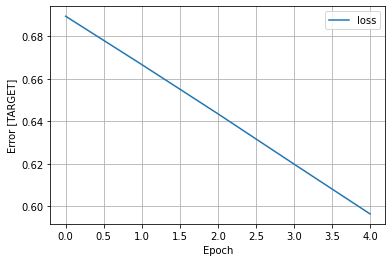

array([[0.56001353, 0.43998647],
       [0.57415545, 0.42584458],
       [0.5684674 , 0.43153262],
       ...,
       [0.56552804, 0.43447205],
       [0.569169  , 0.43083096],
       [0.5659393 , 0.43406072]], dtype=float32)

In [75]:
learning_rate = 0.01
batch_size = 800
num_epochs = 5
num_trees = 10
depth = 5
used_features_rate = 0.5

forest_model = create_forest_model()
run_experiment(forest_model)

Start training the model...
Epoch 1/2
1/1 [==============================] - 2s 2s/step - loss: 0.6994 - sparse_categorical_accuracy: 0.0700
Epoch 2/2
1/1 [==============================] - 0s 15ms/step - loss: 0.6945 - sparse_categorical_accuracy: 0.5500
Model training finished
Evaluating the model on the test data...
4/4 [==============================] - 2s 192ms/step - loss: 0.6890 - sparse_categorical_accuracy: 0.9392
Test accuracy: 93.925%


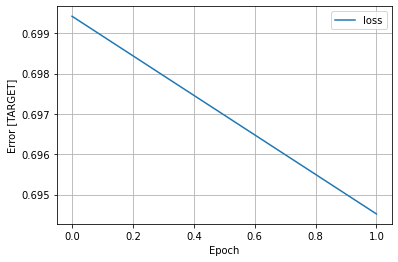

array([[0.5016092 , 0.49839085],
       [0.5007794 , 0.4992206 ],
       [0.50172436, 0.49827573],
       ...,
       [0.50172436, 0.49827573],
       [0.50172436, 0.49827573],
       [0.50298464, 0.49701542]], dtype=float32)

In [76]:
learning_rate = 0.005
batch_size = 1000
num_epochs = 2
num_trees = 3
depth = 1
used_features_rate = 0.02

forest_model = create_forest_model()
run_experiment(forest_model)

Start training the model...
Epoch 1/2
1/1 [==============================] - 2s 2s/step - loss: 0.7009 - sparse_categorical_accuracy: 0.0490
Epoch 2/2
1/1 [==============================] - 0s 14ms/step - loss: 0.6999 - sparse_categorical_accuracy: 0.0510
Model training finished
Evaluating the model on the test data...
4/4 [==============================] - 2s 189ms/step - loss: 0.6992 - sparse_categorical_accuracy: 0.0775
Test accuracy: 7.75%


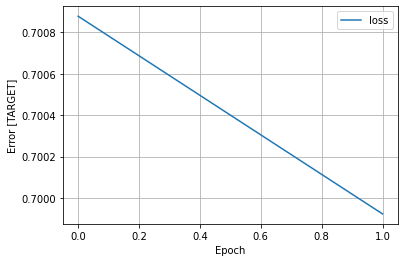

array([[0.4967606 , 0.5032394 ],
       [0.4974476 , 0.5025524 ],
       [0.49688005, 0.50311995],
       ...,
       [0.4963741 , 0.50362587],
       [0.49636522, 0.50363475],
       [0.4970221 , 0.5029779 ]], dtype=float32)

In [77]:
learning_rate = 0.001
batch_size = 1000
num_epochs = 2
num_trees = 2
depth = 1
used_features_rate = 0.02

forest_model = create_forest_model()
run_experiment(forest_model)